In [1]:
# -*- coding:utf-8 -*-
%matplotlib inline
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pylab as plt
from dateutil.relativedelta import relativedelta

#cat result_uniq_sort.log | grep ha_holaverse_int | grep ^2016-07-25 | awk -F '\t' '{print $1,$5,$4}' | sort | awk '{a[$1"#"$2]++}END{for (i in a) print i,a[i]}' | sort > result_uniq_sort_ha_holaverse_int_ts.log
# 参考 http://www.cnblogs.com/foley/p/5582358.html

In [2]:
def dfSplit(line):
    return line.split('#')[1]

logPath ="/Users/holazhai/Documents/workspace/readshift/result_uniq_sort_ha_holaverse_int_ts.log"
colname = ['visitDay', 'cnt']
df = pd.read_table(logPath,sep=' ',names=colname,encoding='utf-8')
df['vDay']=df['visitDay'].apply(dfSplit)

df.index=df['vDay']
df.index = pd.to_datetime(df['vDay'])
ts = df['cnt']
print df.head()
print df.dtypes
print ts.head()
print ts.head().index 
print ts['2016-07-27']

                         visitDay   cnt        vDay
vDay                                               
2016-07-25  2016-07-25#2016-07-25  2046  2016-07-25
2016-07-26  2016-07-25#2016-07-26  1092  2016-07-26
2016-07-27  2016-07-25#2016-07-27   802  2016-07-27
2016-07-28  2016-07-25#2016-07-28   678  2016-07-28
2016-07-29  2016-07-25#2016-07-29   601  2016-07-29
visitDay    object
cnt          int64
vDay        object
dtype: object
vDay
2016-07-25    2046
2016-07-26    1092
2016-07-27     802
2016-07-28     678
2016-07-29     601
Name: cnt, dtype: int64
DatetimeIndex(['2016-07-25', '2016-07-26', '2016-07-27', '2016-07-28',
               '2016-07-29'],
              dtype='datetime64[ns]', name=u'vDay', freq=None)
802


In [3]:
ts['2016-11']

vDay
2016-11-01    84
2016-11-02    69
2016-11-03    74
2016-11-04    85
2016-11-05    81
2016-11-06    93
2016-11-07    71
2016-11-08    56
Name: cnt, dtype: int64

In [4]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 移动平均图
def draw_trend(timeSeries, size):
    f = plt.figure(facecolor='white')
    # 对size个数据进行移动平均
    rol_mean = timeSeries.rolling(window=size).mean()
    # 对size个数据进行加权移动平均
    rol_weighted_mean = pd.ewma(timeSeries, span=size)

    timeSeries.plot(color='blue', label='Original')
    rol_mean.plot(color='red', label='Rolling Mean')
    rol_weighted_mean.plot(color='black', label='Weighted Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show()

def draw_ts(timeSeries):
    f = plt.figure(facecolor='white')
    timeSeries.plot(color='blue')
    plt.show()

'''
　　Unit Root Test
   The null hypothesis of the Augmented Dickey-Fuller is that there is a unit
   root, with the alternative that there is no unit root. That is to say the
   bigger the p-value the more reason we assert that there is a unit root
'''
def testStationarity(ts):
    #单位根检验：ADF是一种常用的单位根检验方法，他的原假设为序列具有单位根，即非平稳，
    #对于一个平稳的时序数据，就需要在给定的置信水平上显著，拒绝原假设。
    dftest = adfuller(ts)
    # 对上述函数求得的值进行语义描述
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    return dfoutput

# 自相关和偏相关图，默认阶数为31阶
def draw_acf_pacf(ts, lags=31):
    f = plt.figure(facecolor='white')
    ax1 = f.add_subplot(211)
    plot_acf(ts, lags=31, ax=ax1)
    ax2 = f.add_subplot(212)
    plot_pacf(ts, lags=31, ax=ax2)
    plt.show()

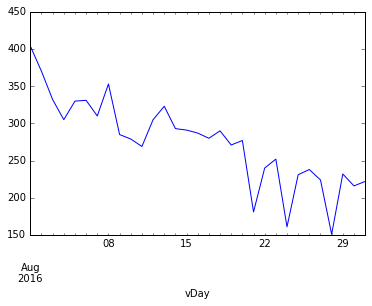

In [8]:
ts08=ts['2016-08':'2016-08']
draw_ts(ts08)

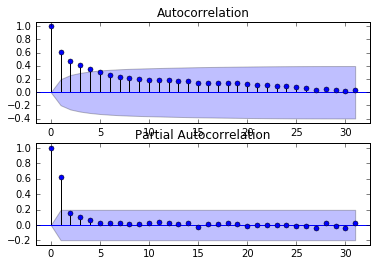

In [16]:
draw_acf_pacf(ts08)

In [17]:
testStationarity(ts08)

Test Statistic                 -2.394977
p-value                         0.143159
#Lags Used                      6.000000
Number of Observations Used    92.000000
Critical Value (5%)            -2.893508
Critical Value (1%)            -3.503515
Critical Value (10%)           -2.583824
dtype: float64

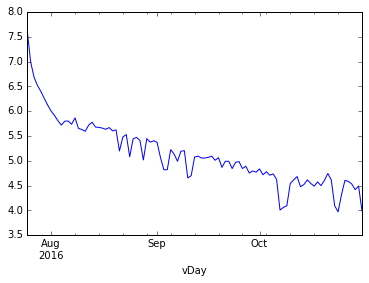

In [18]:
#对数列进行对数变换
ts_log = np.log(ts08)
draw_ts(ts_log)

/Users/holazhai/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,span=7,min_periods=0,adjust=True).mean()


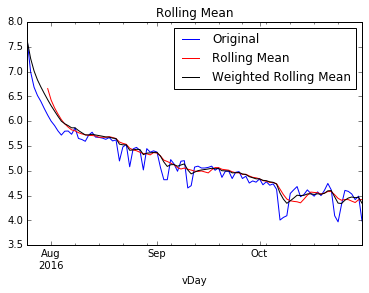

In [19]:
#平滑法
draw_trend(ts_log, 7)

In [28]:
print ts_log.head(5)
print ts_log.shift().head(5)
print ts_log.diff(1).head(5)
print ts_log.rolling(window=7).mean().head(9)

vDay
2016-07-25    7.623642
2016-07-26    6.995766
2016-07-27    6.687109
2016-07-28    6.519147
2016-07-29    6.398595
Name: cnt, dtype: float64
vDay
2016-07-25         NaN
2016-07-26    7.623642
2016-07-27    6.995766
2016-07-28    6.687109
2016-07-29    6.519147
Name: cnt, dtype: float64
vDay
2016-07-25         NaN
2016-07-26   -0.627876
2016-07-27   -0.308658
2016-07-28   -0.167961
2016-07-29   -0.120552
Name: cnt, dtype: float64
vDay
2016-07-25         NaN
2016-07-26         NaN
2016-07-27         NaN
2016-07-28         NaN
2016-07-29         NaN
2016-07-30         NaN
2016-07-31    6.657500
2016-08-01    6.425754
2016-08-02    6.271145
Name: cnt, dtype: float64


In [33]:
#差分
diff_12 = ts_log.diff(1)
diff_12.dropna(inplace=True)
diff_12_1 = diff_12.diff(1)
diff_12_1.dropna(inplace=True)
testStationarity(diff_12)

Test Statistic                -6.090744e+00
p-value                        1.037950e-07
#Lags Used                     5.000000e+00
Number of Observations Used    9.200000e+01
Critical Value (5%)           -2.893508e+00
Critical Value (1%)           -3.503515e+00
Critical Value (10%)          -2.583824e+00
dtype: float64

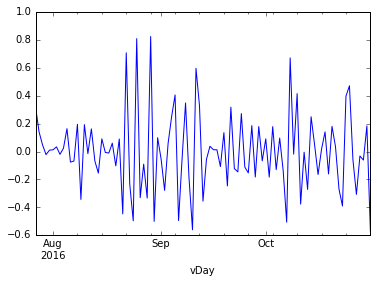

In [35]:
draw_ts(diff_12)

In [25]:
#分解
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log.values, freq=7, model="additive")

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

/Users/holazhai/anaconda/lib/python2.7/site-packages/statsmodels/tsa/filters/filtertools.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.r_[[np.nan] * head, x, [np.nan] * tail]


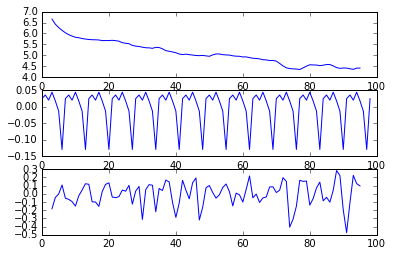

In [26]:
plt.figure()
ax1 = plt.subplot(311) # 
ax2 = plt.subplot(312) # 
ax3 = plt.subplot(313) # 

plt.sca(ax1)
plt.plot(trend)
plt.sca(ax2)
plt.plot(seasonal)
plt.sca(ax3)
plt.plot(residual)


In [29]:
rol_mean = ts_log.rolling(window=7).mean()
rol_mean.dropna(inplace=True)
ts_diff_1 = rol_mean.diff(1)
ts_diff_1.dropna(inplace=True)
testStationarity(ts_diff_1)

Test Statistic                 -3.879746
p-value                         0.002189
#Lags Used                      7.000000
Number of Observations Used    84.000000
Critical Value (5%)            -2.896616
Critical Value (1%)            -3.510712
Critical Value (10%)           -2.585482
dtype: float64

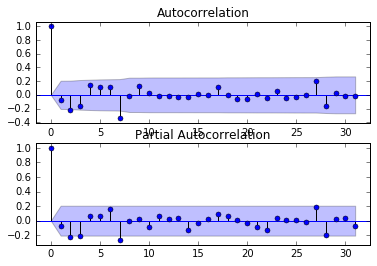

In [30]:
ts_diff_2 = ts_diff_1.diff(1)
ts_diff_2.dropna(inplace=True)
draw_acf_pacf(ts_diff_2)

In [31]:
from statsmodels.tsa.arima_model import ARMA
model = ARMA(ts_diff_2, order=(1, 1)) 
result_arma = model.fit( disp=-1, method='css')

predict_ts = result_arma.predict()
# 一阶差分还原
diff_shift_ts = ts_diff_1.shift(1)
diff_recover_1 = predict_ts.add(diff_shift_ts)
# 再次一阶差分还原
rol_shift_ts = rol_mean.shift(1)
diff_recover = diff_recover_1.add(rol_shift_ts)
# 移动平均还原
rol_sum = ts_log.rolling(window=6).sum()
rol_recover = diff_recover*7 - rol_sum.shift(1)
# 对数还原
log_recover = np.exp(rol_recover)
log_recover.dropna(inplace=True)
log_recover.head

/Users/holazhai/anaconda/lib/python2.7/site-packages/statsmodels/base/data.py:503: FutureWarning: TimeSeries is deprecated. Please use Series
  return TimeSeries(result, index=self.predict_dates)


<bound method Series.head of 2016-08-03    377.820422
2016-08-04    361.155153
2016-08-05    337.075760
2016-08-06    330.210657
2016-08-07    316.146138
2016-08-08    292.156701
2016-08-09    312.022241
2016-08-10    259.547052
2016-08-11    251.658425
2016-08-12    280.680674
2016-08-13    289.945368
2016-08-14    280.944517
2016-08-15    314.056680
2016-08-16    233.533971
2016-08-17    258.477288
2016-08-18    248.933070
2016-08-19    295.098687
2016-08-20    278.084871
2016-08-21    247.109628
2016-08-22    201.198988
2016-08-23    236.816746
2016-08-24    240.246640
2016-08-25    192.496000
2016-08-26    219.559302
2016-08-27    238.384293
2016-08-28    148.278987
2016-08-29    200.567897
2016-08-30    230.569753
2016-08-31    137.043857
2016-09-01    262.856743
                 ...    
2016-10-02    129.750796
2016-10-03    104.279493
2016-10-04    123.462496
2016-10-05    100.452570
2016-10-06    115.850649
2016-10-07    103.004945
2016-10-08     76.762581
2016-10-09     67.781

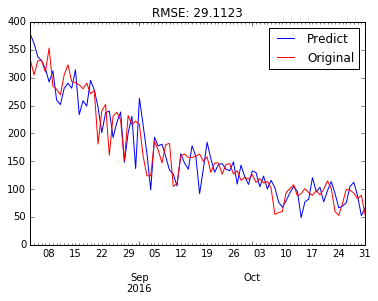

In [32]:

ts = ts[log_recover.index]  # 过滤没有预测的记录
plt.figure(facecolor='white')
log_recover.plot(color='blue', label='Predict')
ts.plot(color='red', label='Original')
plt.legend(loc='best')
plt.title('RMSE: %.4f'% np.sqrt(sum((log_recover-ts)**2)/ts.size))
plt.show()

In [53]:
ts07=ts['2016-08':'2016-08-08']
print ts07
#print ts07.shift(1)
#print ts07.diff(1)

predict_ts=ts07.diff(1)

# 一阶差分还原
diff_shift_ts = ts07.shift(1)
print diff_shift_ts
new_index = ts07.index[-1] + relativedelta(days=1)
print new_index
diff_shift_ts[new_index]=ts07[ts07.index[-1]]
print diff_shift_ts

diff_recover_1 = predict_ts.add(diff_shift_ts)
print diff_recover_1

2016-08-03    332
2016-08-04    305
2016-08-05    330
2016-08-06    331
2016-08-07    310
2016-08-08    353
Name: cnt, dtype: int64
2016-08-03      NaN
2016-08-04    332.0
2016-08-05    305.0
2016-08-06    330.0
2016-08-07    331.0
2016-08-08    310.0
Name: cnt, dtype: float64
2016-08-09 00:00:00
2016-08-03      NaN
2016-08-04    332.0
2016-08-05    305.0
2016-08-06    330.0
2016-08-07    331.0
2016-08-08    310.0
2016-08-09    353.0
Name: cnt, dtype: float64
2016-08-03      NaN
2016-08-04    305.0
2016-08-05    330.0
2016-08-06    331.0
2016-08-07    310.0
2016-08-08    353.0
2016-08-09      NaN
Name: cnt, dtype: float64
